In [56]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [57]:
df = pd.read_csv("cricketers.csv")

df.head()

,Cap,Name,First,Last,Mat,Runs,HS,Avg,100/50,Wkt,BBI,Ave,5/10 wicket,Ca,St
0,1,Amar Singh,1932,1936,7,292,51,22.46,0/1,28,Jul-86,30.64,Feb-00,3.0,0.0
1,2,Sorabji Colah,1932,1933,2,69,31,17.25,0/0,-,-,-,-/-,2.0,0.0
2,3,Jahangir Khan,1932,1936,4,39,13,5.57,0/0,4,Apr-60,63.75,0/0,4.0,0.0
3,4,Lall Singh,1932,1932,1,44,29,22,0/0,-,-,-,-/-,1.0,0.0
4,5,Naoomal Jeoomal,1932,1934,3,108,43,27,0/0,2,4-Jan,34,0/0,0.0,0.0


In [58]:
df1 = df[["Name", "Runs", "Wkt"]]

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    303 non-null    object
 1   Runs    303 non-null    object
 2   Wkt     303 non-null    object
dtypes: object(3)
memory usage: 7.2+ KB


In [59]:
df2 = df1[(df1.Wkt != '-') & (df1.Runs != '-')]

df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 224 entries, 0 to 301
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    224 non-null    object
 1   Runs    224 non-null    object
 2   Wkt     224 non-null    object
dtypes: object(3)
memory usage: 7.0+ KB


In [60]:
df3 = df2.astype({"Runs": "int32", "Wkt": "int32"})

df3.describe()

,Runs,Wkt
count,224.000000,224.000000
mean,1037.218750,35.495536
std,2122.604427,80.578068
min,0.000000,0.000000
25%,28.750000,1.000000
50%,189.500000,4.000000
75%,1024.000000,29.750000
max,15921.000000,619.000000


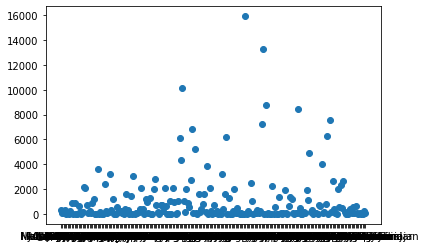

In [61]:
plt.scatter(df3.Name, df3.Runs)

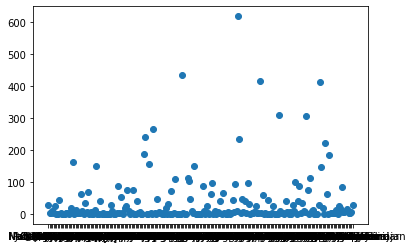

In [62]:
plt.scatter(df3.Name, df3.Wkt)

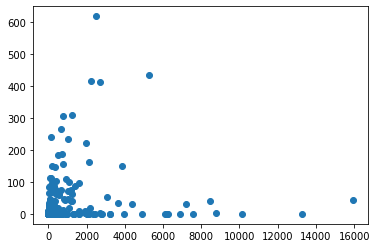

In [63]:
plt.scatter(df3.Runs, df3.Wkt)

In [64]:
# fig = plt.figure()
# ax = plt.axes(projection="3d")
# ax.scatter3D(df3.Name, df3.Wkt, df3.Runs)

In [66]:
X_train, X_test, y_train, y_test = train_test_split(df3.drop(columns=["Name"]), df3.Name, test_size=0.2, random_state=0)

In [68]:
kmean = KMeans(2)

kmean.fit(X_train, y_train)

kmean.score(X_test, y_test)

-123784201.95788977